In [1]:
import requests
import pandas as pd

def get_fxs_market_data(days=90):
    url = "https://api.coingecko.com/api/v3/coins/frax-share/market_chart"
    params = {
        "vs_currency": "usd",
        "days": days,
        "interval": "daily"
    }
    response = requests.get(url, params=params)
    data = response.json()
    
    df = pd.DataFrame(data["market_caps"], columns=["timestamp", "market_cap"])
    df["price"] = [p[1] for p in data["prices"]]
    df["volume"] = [v[1] for v in data["total_volumes"]]
    df["date"] = pd.to_datetime(df["timestamp"], unit="ms")
    df.drop(columns=["timestamp"], inplace=True)
    return df

fxs_df = get_fxs_market_data(days=90)
fxs_df.to_csv("data/raw/fxs_price_volume.csv", index=False)
fxs_df.head()

,market_cap,price,volume,date
0,2.206728e+08,2.454783,2.095785e+07,2025-05-10
1,2.492135e+08,2.775108,2.229947e+07,2025-05-11
2,2.430507e+08,2.699255,1.784124e+07,2025-05-12
3,2.448186e+08,2.717449,1.931384e+07,2025-05-13
4,2.663447e+08,2.943600,1.900519e+07,2025-05-14


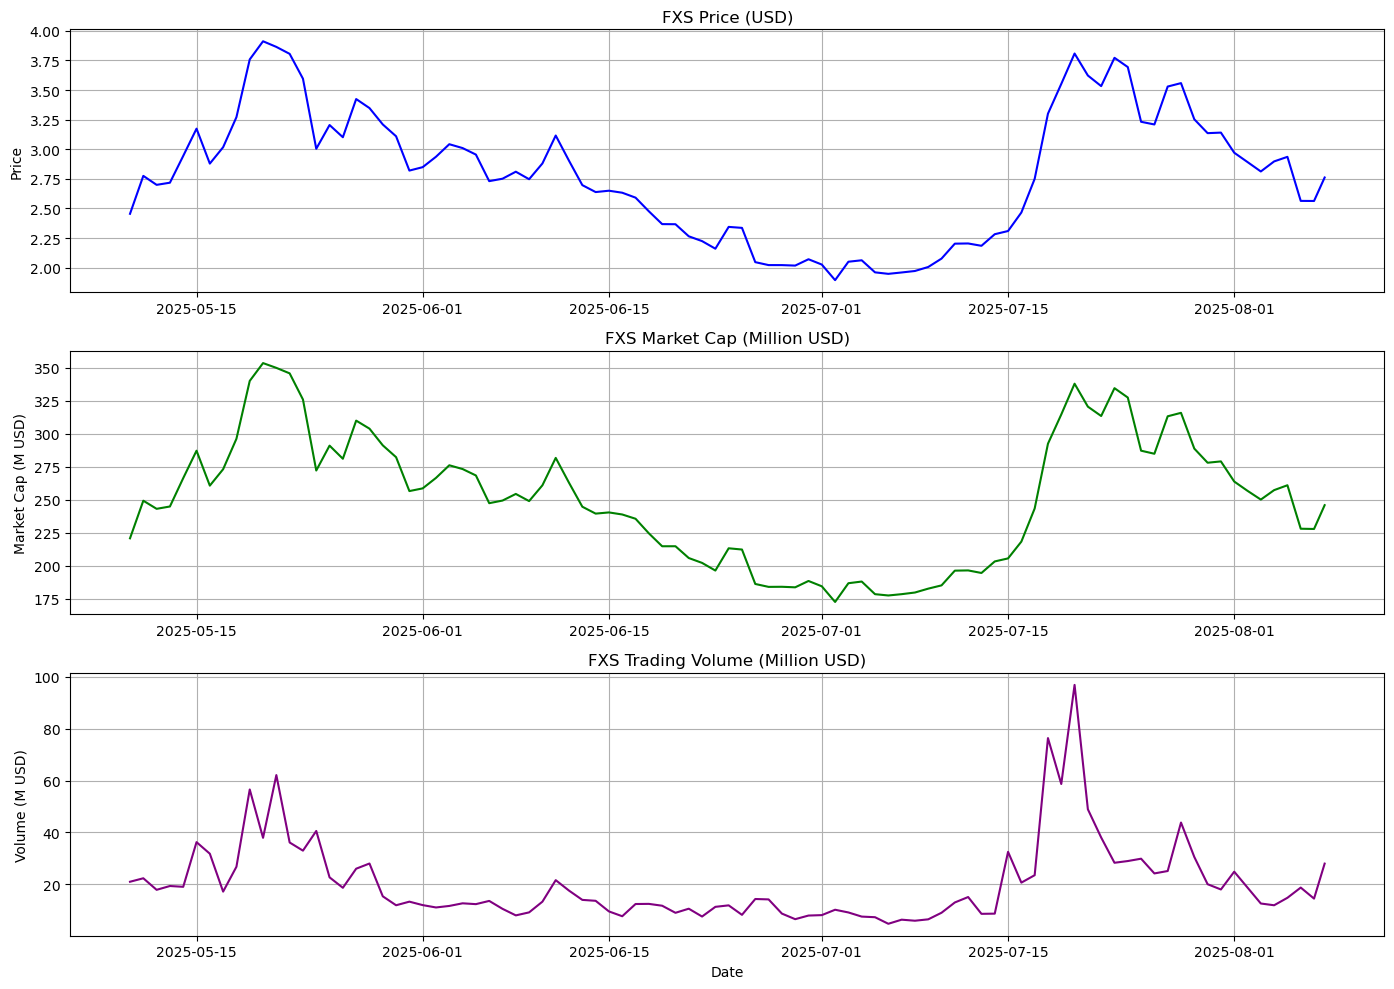

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
plt.plot(fxs_df["date"], fxs_df["price"], color="blue")
plt.title("FXS Price (USD)")
plt.ylabel("Price")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(fxs_df["date"], fxs_df["market_cap"] / 1e6, color="green")
plt.title("FXS Market Cap (Million USD)")
plt.ylabel("Market Cap (M USD)")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(fxs_df["date"], fxs_df["volume"] / 1e6, color="purple")
plt.title("FXS Trading Volume (Million USD)")
plt.xlabel("Date")
plt.ylabel("Volume (M USD)")
plt.grid(True)

plt.tight_layout()
plt.show()